In [75]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.dates as mdates
import seaborn as sns

In [76]:
#Import Data
data = pd.read_csv("VIX_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
data

,Date,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,Initial Claims,JPY/USD Spot Rate,Total Nonfarm Employees,Spot Crude Oil Price
0,2014-09-01,5.9,237.477,0.02,0.04,2.53,0.09,3.54,1975.045,12.880,17804.228,1180000,107.43,139564,93.21
1,2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,1946.160,16.530,17912.079,1155000,108.03,139804,84.40
2,2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,13.330,17912.079,1458000,116.30,140088,75.79
3,2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,15.155,17912.079,1138000,119.32,140366,59.29
4,2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,19.455,18063.529,1438000,118.25,140562,47.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-04-01,3.9,313.207,5.24,5.15,4.54,5.33,5.84,5108.065,15.745,29016.714,841000,153.89,158214,85.35
116,2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,12.920,29016.714,892000,155.87,158430,80.02
117,2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,12.645,29016.714,1184000,157.86,158548,79.77
118,2024-07-01,4.3,313.534,5.20,5.01,4.25,5.33,5.53,5550.165,13.190,29016.714,953000,157.52,158637,81.80


In [77]:
summary_stats = data.drop(columns='Date').describe()
summary_stats

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,Initial Claims,JPY/USD Spot Rate,Total Nonfarm Employees,Spot Crude Oil Price
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000
mean,4.735000,264.336750,1.628083,1.715000,2.421583,1.626833,3.993500,3233.144625,17.724792,22287.942942,1.617425e+06,118.887917,148174.200000,62.335917
std,1.740262,25.288285,1.830762,1.799761,1.004239,1.810618,1.109915,1011.288726,6.762568,3508.616774,2.130207e+06,14.733582,5774.455603,18.517934
min,3.400000,234.747000,0.020000,0.040000,0.620000,0.050000,2.120000,1906.900000,10.005000,17804.228000,7.910000e+05,101.240000,130421.000000,16.550000
25%,3.700000,243.976000,0.107500,0.150000,1.747500,0.120000,3.320000,2351.275000,13.257500,19280.084000,8.987500e+05,108.857500,143808.500000,48.690000
50%,4.200000,255.942000,0.980000,1.110000,2.300000,0.975000,3.770000,2904.670000,15.867500,21397.938000,1.066500e+06,112.770000,148167.000000,59.280000
75%,5.100000,285.289500,2.355000,2.440000,2.902500,2.382500,4.615000,4131.812500,20.567500,25215.491000,1.265500e+06,123.412500,151826.000000,76.162500
max,14.800000,314.121000,5.340000,5.330000,4.800000,5.330000,6.550000,5550.165000,59.415000,29016.714000,1.865300e+07,157.860000,158779.000000,114.840000


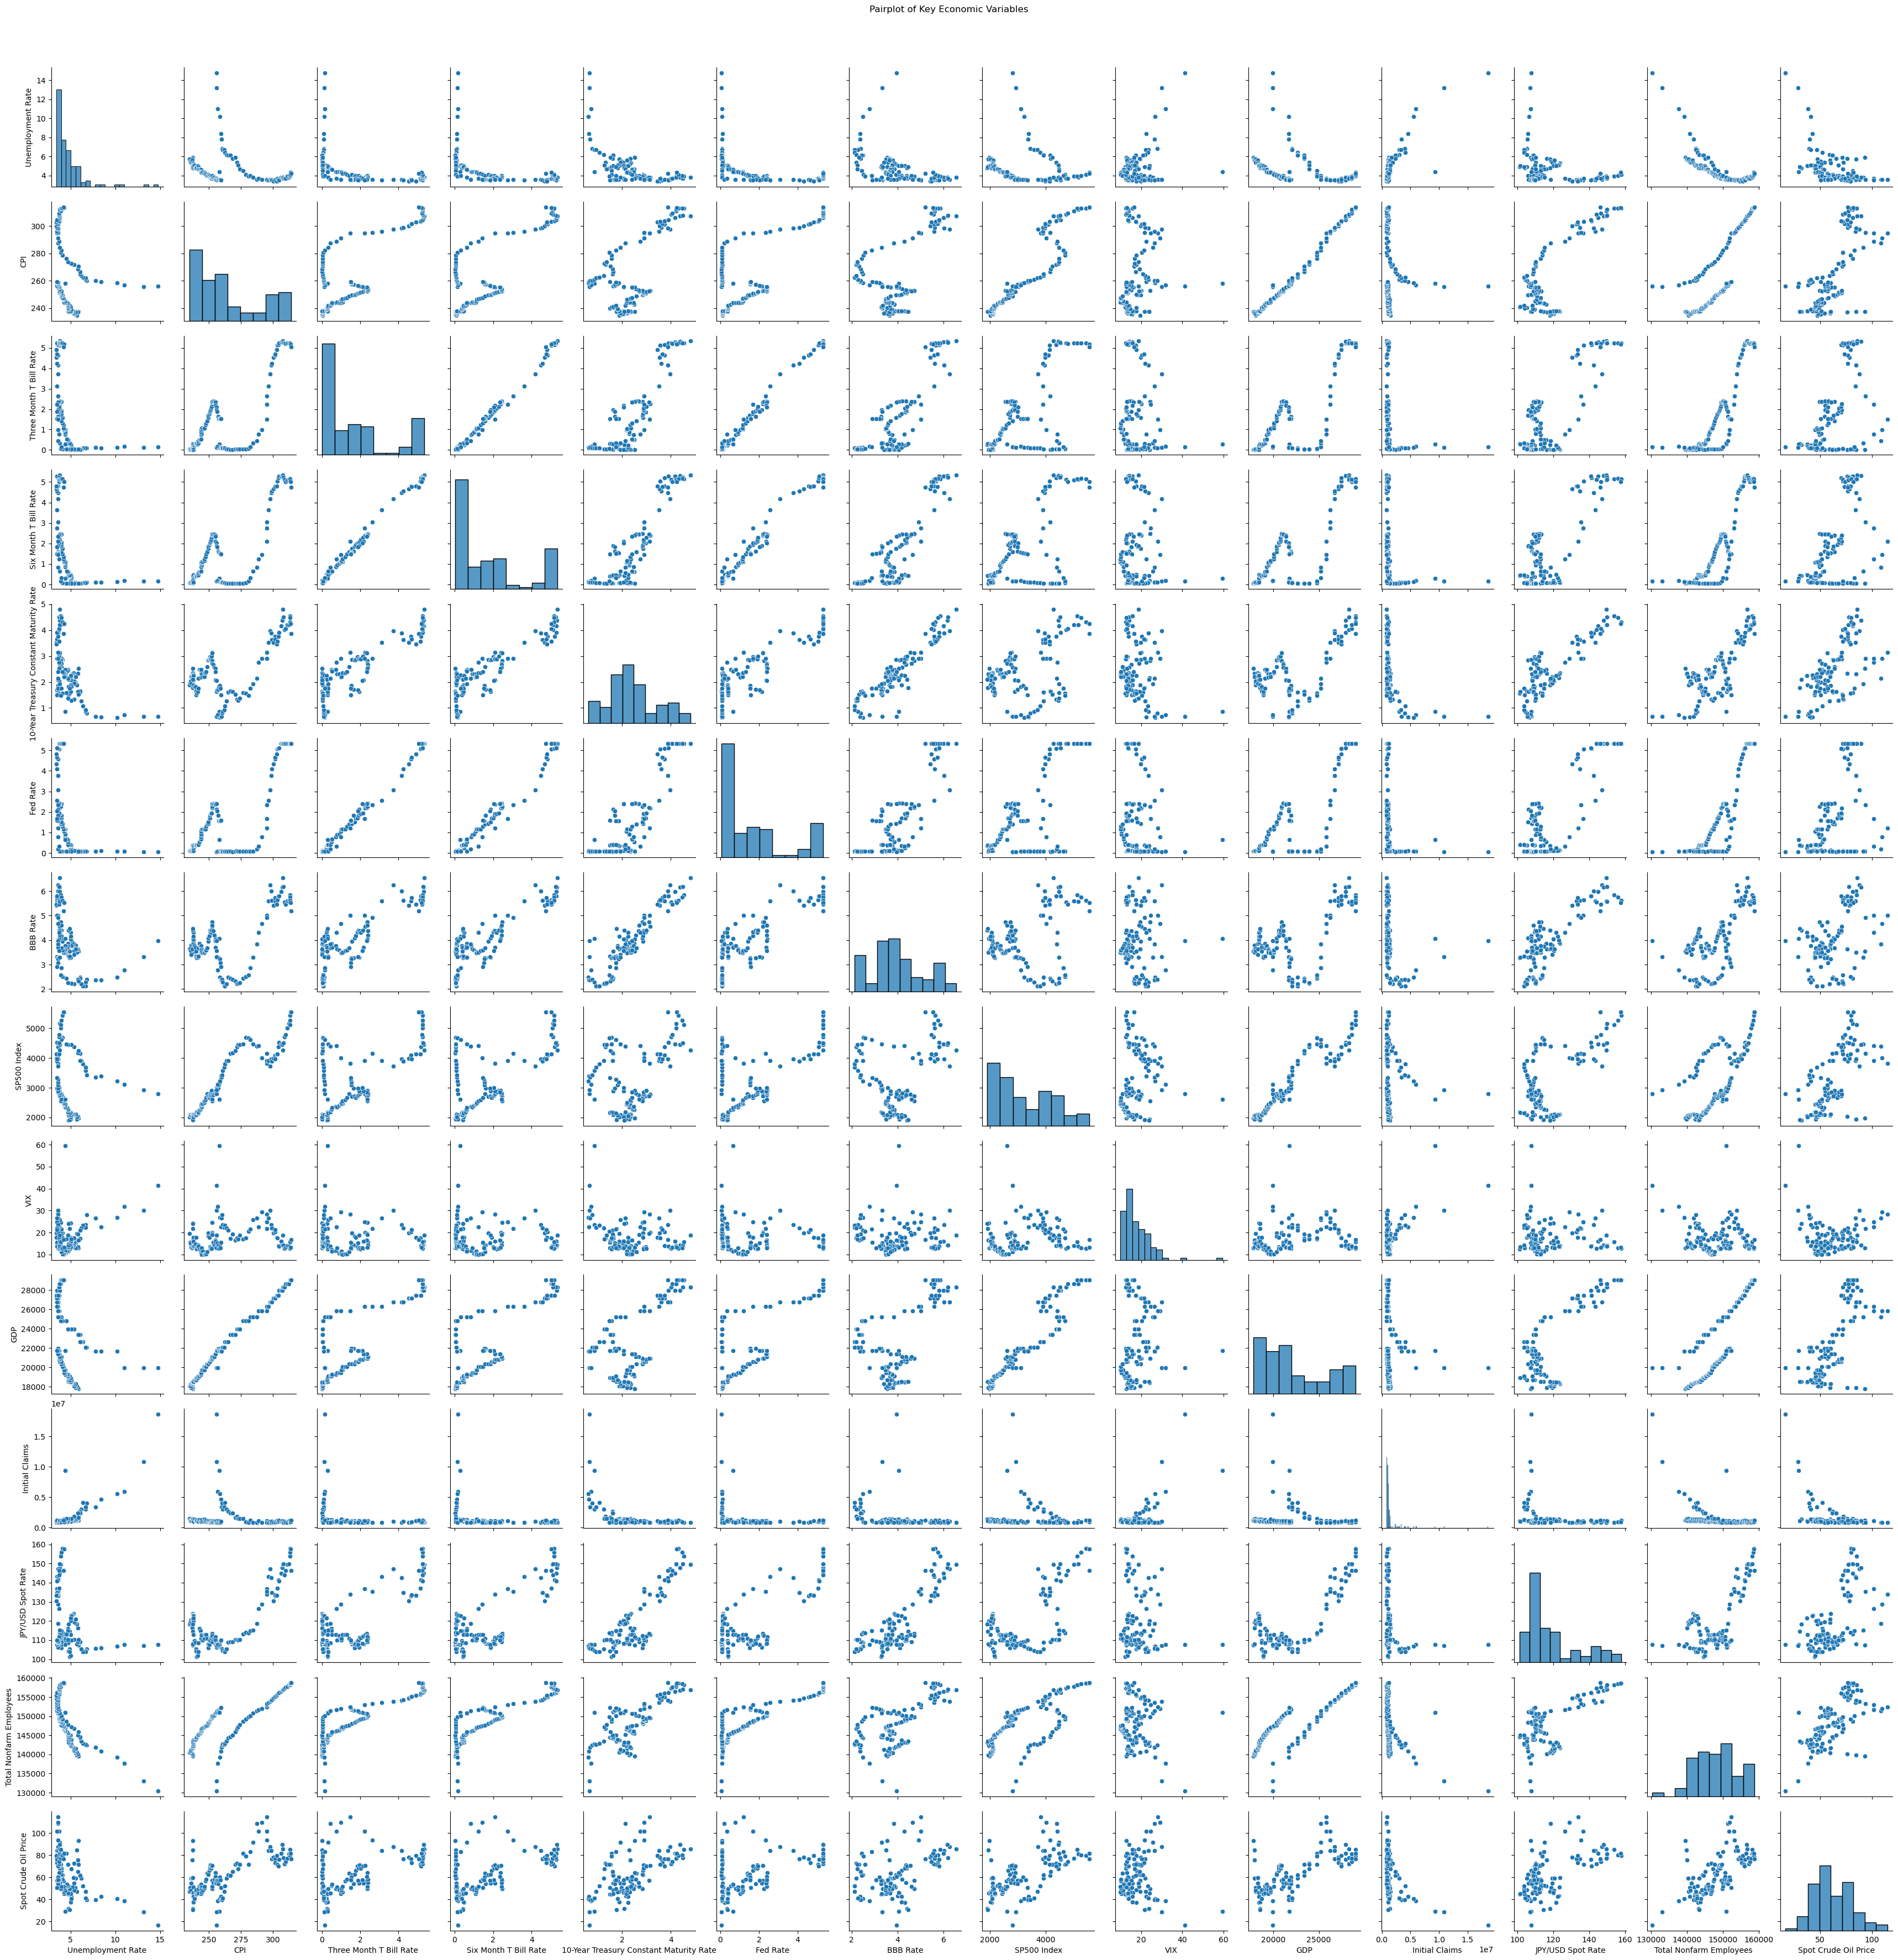

In [78]:
sns.pairplot(data[data.drop(columns='Date').columns.values.tolist()])
plt.suptitle('Pairplot of Key Economic Variables', y=1.02)
plt.show()

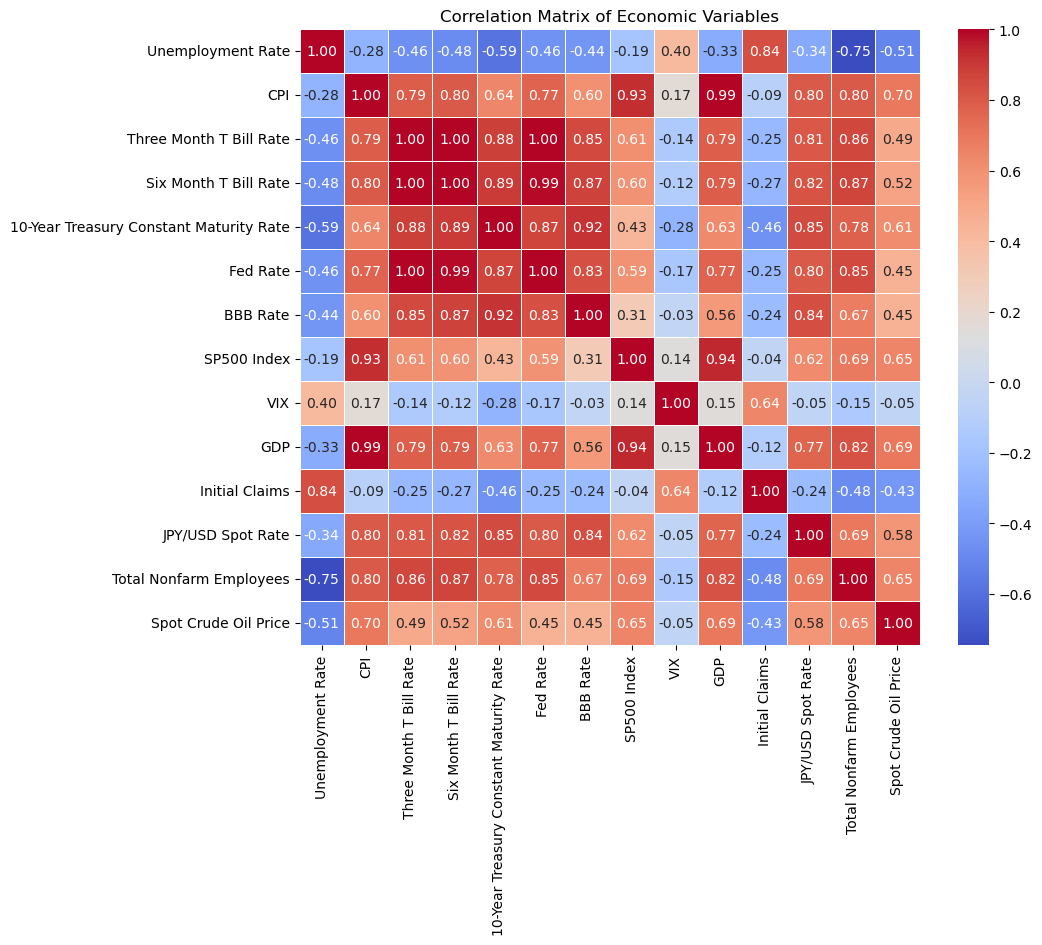

In [79]:
corr_matrix = data.drop(columns=["Date"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Variables')
plt.show()

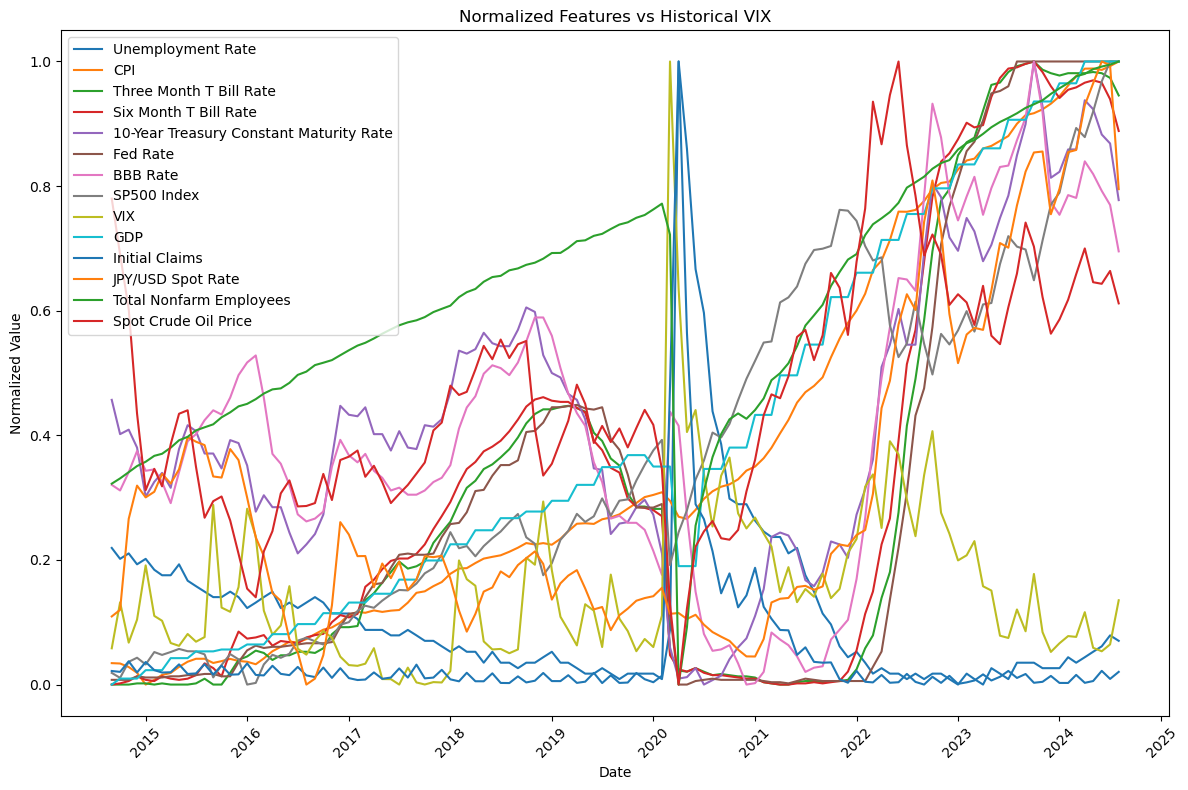

In [80]:
# Normalize the selected features along with VIX for plotting
features_to_normalize = data.drop(columns=["Date"]).columns

# Normalize using Min-Max scaling
normalized_data = data[features_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot the normalized features together with VIX
plt.figure(figsize=(12, 8))
for column in normalized_data.columns:
    plt.plot(data['Date'], normalized_data[column], label=column)

plt.xticks(rotation=45)
plt.title('Normalized Features vs Historical VIX')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 10, not 11

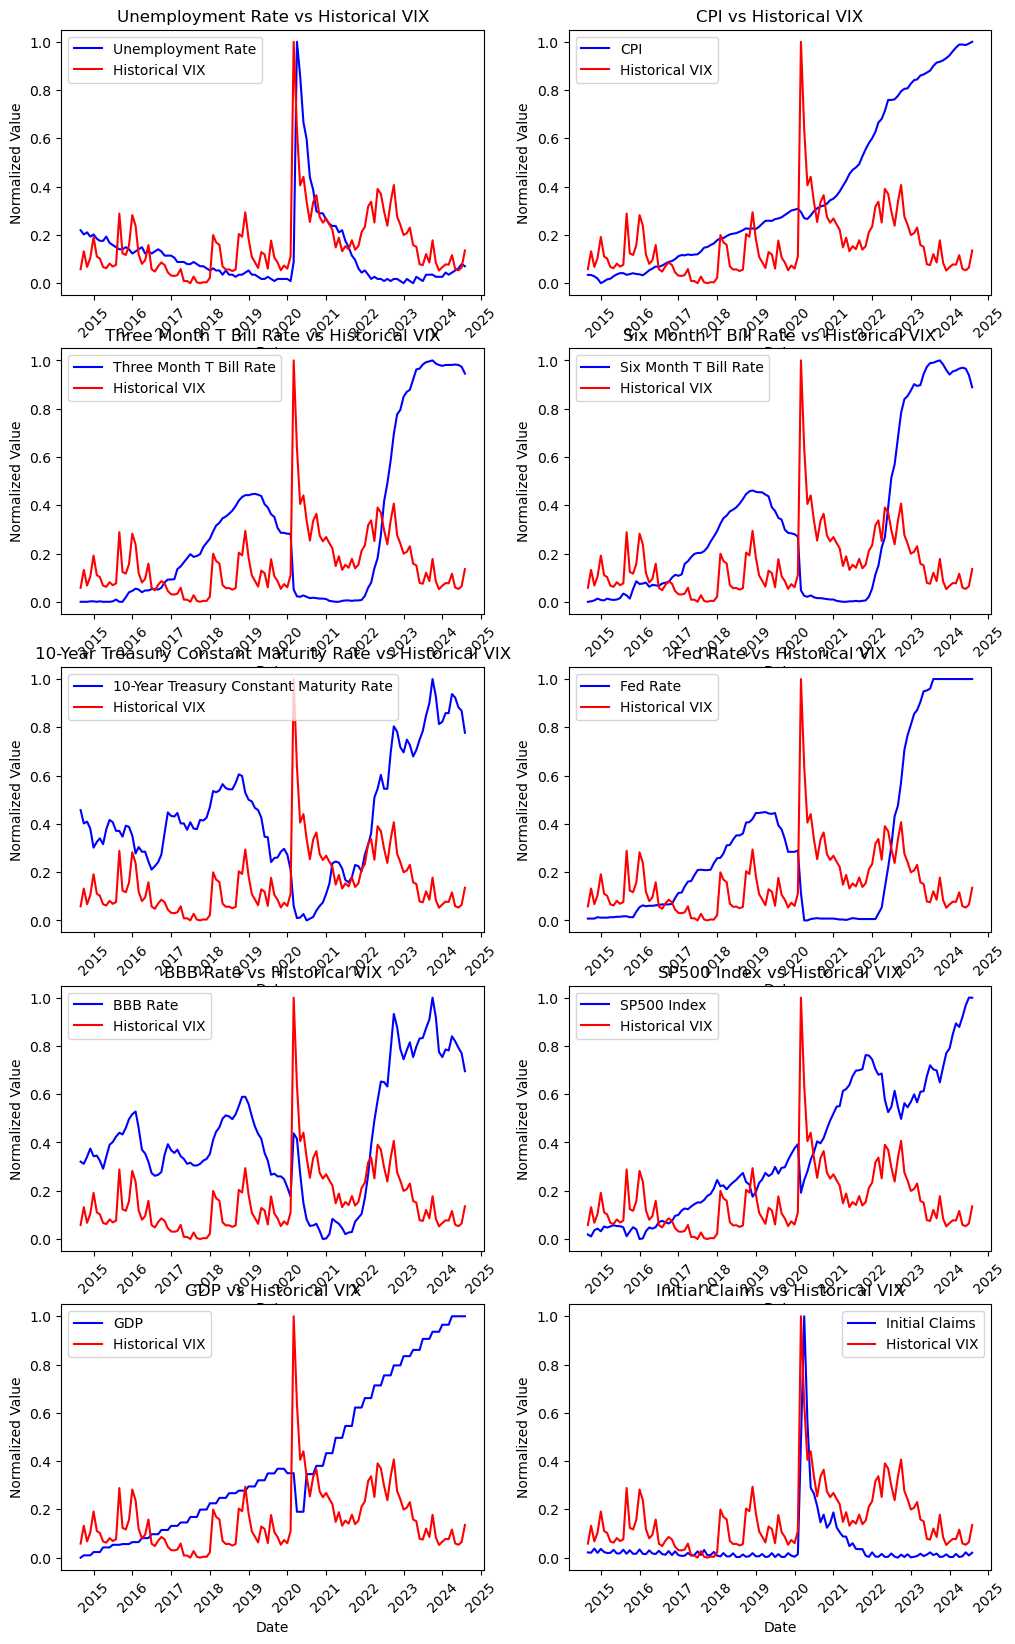

In [81]:
# Create individual plots for each feature along with VIX
features = data.drop(columns=["Date","VIX"]).columns

plt.figure(figsize=(12, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)
    plt.plot(data['Date'], normalized_data[feature], label=feature, color='blue')
    plt.plot(data['Date'], normalized_data['VIX'], label='Historical VIX', color='red')
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Historical VIX')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()

plt.tight_layout()
plt.show()